<a href="https://colab.research.google.com/github/svenmackan/TestingStuff/blob/main/AIModelAgainstSwarmOfDrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -q inference supervision

In [10]:
from google.colab import userdata
from inference import get_model

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
MODEL_ID = 'drone_mil-u8fqk-xn200/1'
model = get_model(MODEL_ID, ROBOFLOW_API_KEY)

In [11]:
import cv2
IMAGE_PATH = "/content/ManyDronesTest.jpg"
image = cv2.imread(IMAGE_PATH)

In [12]:
results = model.infer(image, confidence = 0.4)[0]

In [13]:
results

ObjectDetectionInferenceResponse(visualization=None, inference_id=None, frame_id=None, time=None, image=InferenceResponseImage(width=2000, height=1543), predictions=[ObjectDetectionPrediction(x=1673.0, y=356.0, width=594.0, height=374.0, confidence=0.8082450032234192, class_name='drone', class_confidence=None, class_id=0, tracker_id=None, detection_id='02ec357b-b4f4-4cdc-998d-29f3a6bc216e', parent_id=None), ObjectDetectionPrediction(x=164.0, y=537.5, width=298.0, height=183.0, confidence=0.8050975799560547, class_name='drone', class_confidence=None, class_id=0, tracker_id=None, detection_id='f4a3555c-1e19-487d-a463-86348c86a3b9', parent_id=None), ObjectDetectionPrediction(x=460.0, y=224.0, width=306.0, height=246.0, confidence=0.7973584532737732, class_name='drone', class_confidence=None, class_id=0, tracker_id=None, detection_id='7a7f0a28-19d8-4600-99e9-a683ef634ce5', parent_id=None), ObjectDetectionPrediction(x=929.0, y=108.0, width=246.0, height=176.0, confidence=0.7924022674560547,

In [14]:
import supervision as sv
detections = sv.Detections.from_inference(results)

In [15]:
detections

Detections(xyxy=array([[1376.,  169., 1970.,  543.],
       [  15.,  446.,  313.,  629.],
       [ 307.,  101.,  613.,  347.],
       [ 806.,   20., 1052.,  196.],
       [1571., 1007., 1915., 1127.],
       [ 434.,  551.,  657.,  731.],
       [1012.,  295., 1295.,  522.],
       [ 774.,  505., 1013.,  647.],
       [1309., 1307., 1560., 1422.],
       [ 247., 1236., 1037., 1497.],
       [  61., 1071.,  391., 1200.],
       [   6.,  685., 1972., 1343.]]), mask=None, confidence=array([0.808245  , 0.80509758, 0.79735845, 0.79240227, 0.78604424,
       0.77215183, 0.77097905, 0.75195861, 0.74725449, 0.72207355,
       0.69042253, 0.56227577]), class_id=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), tracker_id=None, data={'class_name': array(['drone', 'drone', 'drone', 'drone', 'drone', 'drone', 'drone',
       'drone', 'drone', 'drone', 'drone', 'drone'], dtype='<U5')})

In [16]:
annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections=detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections=detections)

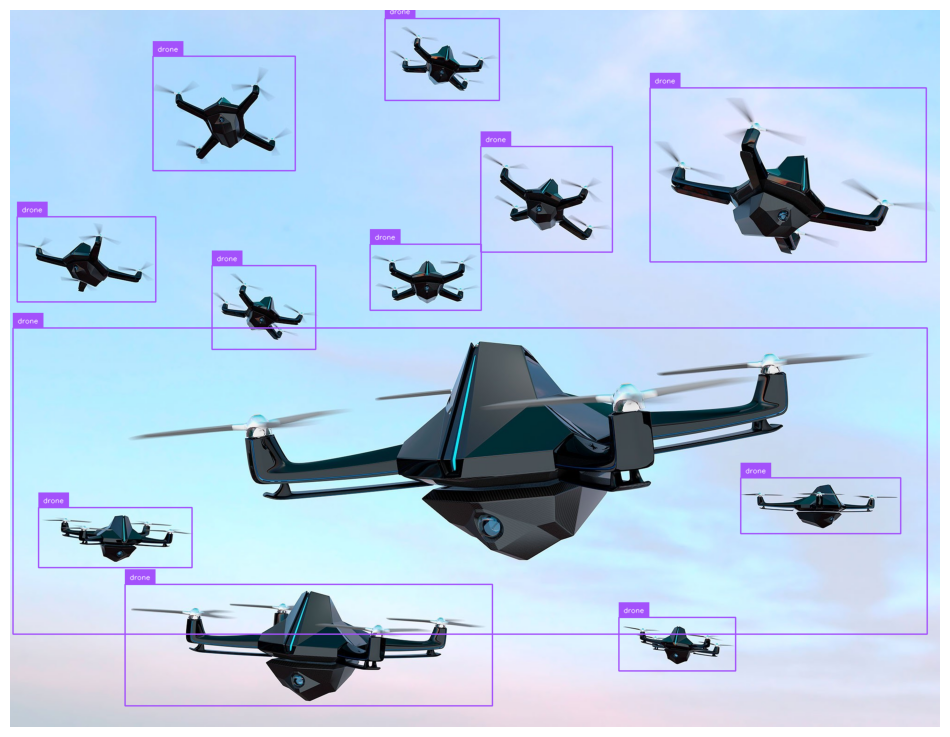

In [18]:
sv.plot_image(annotated_image)

In [19]:
import cv2
from google.colab import files

# Upload the video
uploaded = files.upload()
video_path = list(uploaded.keys())[0]

# Open the video
cap = cv2.VideoCapture(video_path)

# Get frames per second (fps)
fps = cap.get(cv2.CAP_PROP_FPS)

# Create a directory to store the frames
import os
os.makedirs('frames', exist_ok=True)

# Extract frames and apply model inference
frame_count = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break

    # Save the frame
    frame_path = os.path.join('frames', f'frame_{frame_count:04d}.jpg')
    cv2.imwrite(frame_path, frame)

    # Apply your model inference here (replace with your code)
    # results = model.infer(frame, confidence=0.4)[0]
    # ... (process results) ...

    frame_count += 1

cap.release()
print(f"Processed {frame_count} frames. Frames saved in 'frames' directory.")

Saving 0-02-05-1b8ecb2a639247f9c00a6b1fe2d38af694905b106668d0d2f4bbda4ccb3e6936_4c478f39914f8384.mp4 to 0-02-05-1b8ecb2a639247f9c00a6b1fe2d38af694905b106668d0d2f4bbda4ccb3e6936_4c478f39914f8384.mp4
Processed 592 frames. Frames saved in 'frames' directory.


In [21]:
import cv2
import os
import supervision as sv

# Path to the frames directory
IMAGE_FILE_PATH = "/content/frames"

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(IMAGE_FILE_PATH) if os.path.isfile(os.path.join(IMAGE_FILE_PATH, f))]

# Create a directory to store annotated images
os.makedirs('annotated_frames', exist_ok=True)

# Loop through each image file
for image_file in image_files:
    # Load the image
    image_path = os.path.join(IMAGE_FILE_PATH, image_file)
    image = cv2.imread(image_path)

    # Apply model inference
    results = model.infer(image, confidence=0.4)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate the image
    annotated_image = image.copy()
    annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections=detections)
    annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections=detections)

    # Save the annotated image
    annotated_image_path = os.path.join('annotated_frames', image_file)
    cv2.imwrite(annotated_image_path, annotated_image)

# Compile annotated images into a video
import glob

img_array = []
for filename in sorted(glob.glob('annotated_frames/*.jpg')):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width, height)
    img_array.append(img)

out = cv2.VideoWriter('annotated_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

print("Annotated video saved as 'annotated_video.mp4'")

Annotated video saved as 'annotated_video.mp4'
